# Task 2 -  To Explore Supervised Machine Learning

# Task
To predict the percentage of marks that a student is expecting to score based on the numbers of hours the studied. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'http://bit.ly/w-data'

In [3]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Training Algorithm

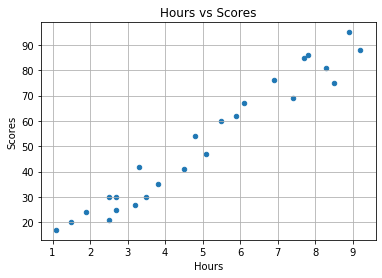

In [7]:
df.plot.scatter(x = 'Hours', y = 'Scores', title = 'Hours vs Scores')
plt.grid()
plt.show()

(0, 101.93883578135264)

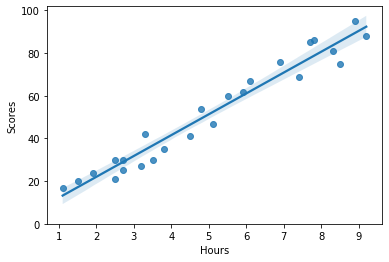

In [8]:
sns.regplot(x = 'Hours', y = 'Scores', data = df)
plt.ylim(0,)

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print("Regressor Intercept: ", reg.intercept_)
print("Regressor Coefficient: ", reg.coef_)

Regressor Intercept:  2.018160041434683
Regressor Coefficient:  [9.91065648]


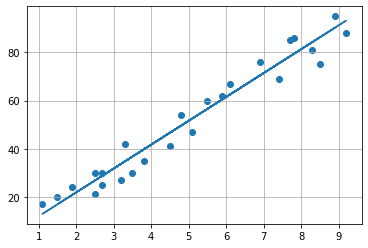

In [14]:
line = reg.coef_*X+reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.grid()
plt.show()

# Making Prediction

In [15]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [16]:
y_pred = reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

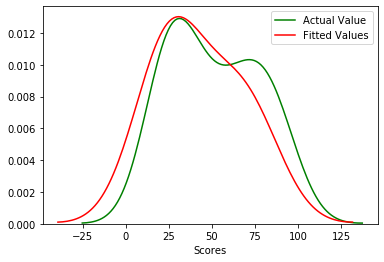

In [17]:
ax1 = sns.distplot(df['Scores'], hist = False, color = 'g', label = 'Actual Value')
sns.distplot(y_pred, hist = False, color = 'r', label = 'Fitted Values', ax = ax1)

In [18]:
#comparing Actual vs Predicted data
final = pd.DataFrame({'Actual': y_test,
                    'Predicted': y_pred})

In [19]:
final

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
print('Number of hours student studied =', 9.25)
print('Predicted score =',reg.predict([[9.25]])[0])

Number of hours student studied = 9.25
Predicted score = 93.69173248737538


In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
